# Jobs Analysis

## Setup

### Installs

In [1]:
%load_ext rpy2.ipython

In [2]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys
sys.path.append("/content/drive/Shareddrives/Working Group - NLP in Engineering Education Research/Fall 2021 Independent Study/Sample code")

In [4]:
!git clone https://github.com/crabcamp/lexrank.git

Cloning into 'lexrank'...
remote: Enumerating objects: 1232, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 1232 (delta 24), reused 49 (delta 21), pack-reused 1172
Receiving objects: 100% (1232/1232), 791.25 KiB | 6.13 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [5]:
# needed for lexrank
!pip install urlextract

In [6]:
import sys
sys.path.append('/content/lexrank/')

from lexrank.lexrank import degree_centrality_scores

In [7]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 5.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 37.3 MB/s 
     |████████████████████████████████| 451 kB 40.2 MB/s 
     |████████████████████████████████| 181 kB 39.2 MB/s 
     |████████████████████████████████| 653 kB 26.8 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [8]:
!pip install umap-learn
!pip install hdbscan
!pip install -U sentence-transformers

     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 34.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=95fae94a3c44a5779c128047c5d8e29753b29c884755864b9b9e029b660ac184
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=ee3555149a7a5d424ca795fcdf0f0c6796a305af1cefc4ae1839914e71c0f901
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
     |████████████████████████████████| 5.2 MB 3.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330871 sha256=649034d938022bccde23b230121b

In [9]:
!pip install keybert

     |████████████████████████████████| 229 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=64009cdf98a88dda1d5ede024101f3ce128d79e751c925c3ea0d7515e762901d
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
Successfully built keybert


### Imports

In [10]:
import embed_cluster as ec

sklearn modules imported


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


transformer module imported


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:882: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import umap
#import umap.plot
import hdbscan
import spacy
from spacy.lang.en import English

from sklearn.manifold import MDS, TSNE

from textblob import TextBlob
import nltk
nltk.download('punkt')


import pickle

from keybert import KeyBERT


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
# this is the code to add download the en_core_web_lg language model for spacy
!python -m spacy download en_core_web_lg
#https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

# note: need to restart runtime after downloading

     |████████████████████████████████| 777.4 MB 6.8 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [13]:
%%R 
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Utility Functions

In [14]:
def select_and_filter(original_df, text_column):
    """
    Parameters
    ----------
    item : str
        Name of the column to filter based on.
    original_df : dataframe
        Original input dataframe with text columns.

    Returns
    -------
    filtered_df : dataframe
        Dataframe that has removed the NAs in the {item} column.
    item_list : list
        List of the text in the {item} column. This list is passed to the transformer model.
    """
    original_df['added_id'] = original_df.index + 1
    filtered_df = original_df.loc[pd.notnull(original_df[text_column])]
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {filtered_df.shape}.")
    
    item_list = filtered_df[text_column].to_list()
    print(f"The list has length {len(item_list)}.")
        
    return filtered_df, item_list

In [15]:
def remove_name(text):
    # nlp = spacy.load("en_core_web_lg")

    doc = nlp(text)
    
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    #print(names)  

    if names:
        new_txt = text
        for name in names:
            new_txt = new_txt.replace(name, "")
            #print(new_txt)
        
        return new_txt
    
    else:
        return text

In [16]:
def sentence_segmenter(data_frame, text_column):
    # first, create list from series of text
    
    entry_list = data_frame[text_column].to_list()
    
    # try using dictionary of lists
    
    new_df_dict = {'text_column': [],
                   'job_id': [],
                  #  'original_entry': [],
                   'split_sent': [],
                   'sent_num': []}
    
    # nlp = English()
    # nlp = spacy.load("en_core_web_lg")
    nlp.add_pipe('sentencizer')
    
    ## using the process of converting series to list and then iterating over list
    for i, entry in enumerate(entry_list):
      doc = nlp(entry)
      sentences = [sent.text.strip() for sent in doc.sents]
      if i % 1000 == 0:
        print(f"finished {i} entries.")

      try:  
        for j, sent in enumerate(sentences):
          # print(sent)
          # new_sent = remove_name(sent)
          new_df_dict['text_column'].append(text_column)
          new_df_dict['job_id'].append(data_frame['job_id'].iloc[i])
          # new_df_dict['original_entry'].append(entry)
          new_df_dict['split_sent'].append(sent)
          new_df_dict['sent_num'].append(j)

      except:
        print(f"Entry {i} sentence {j} failed")
          
    sentence_df = pd.DataFrame(new_df_dict)
    
    item_list = sentence_df['split_sent'].to_list()
    
    print(f"text column length {len(new_df_dict['text_column'])}")
    print(f"job id length {len(new_df_dict['job_id'])}")
    print(f"split sent length {len(new_df_dict['split_sent'])}")
    print(f"sent num length {len(new_df_dict['sent_num'])}")


    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {sentence_df.shape}.")
    print(f"The list has length {len(item_list)}.")

    
    return sentence_df, item_list
    


### Data Import

In [17]:
os.listdir()
proj_path = "/content/drive/Shareddrives/Project - Engineering Jobs and Non-academic Career Pathways"
os.chdir(proj_path)
os.listdir()

['exp Jobs analysis.ipynb',
 'biomedical_us_20210410.gsheet',
 'biomedical_us_20210410.csv',
 '[OLD] Jobs analysis.ipynb',
 'sustainability_US_20210411.csv',
 'eng_jobs.Rmd',
 'jobs_text.py',
 'bme_top50_skills.png',
 'project engineering jobs.Rproj',
 'sus_jobs.Rmd',
 'sustainability jobs map.png',
 '.Rhistory',
 '.gitignore',
 'paper - engineering jobs.docx',
 'eng_jobs.py',
 '.RData',
 'sustainability_Australia.csv',
 'civil_top50_skills.png',
 'environmental_engineering_Australia.csv',
 'Sustainability in Engineering Job Skills.png',
 'civ_ed_grad_df_20210916.csv',
 'sustainability_cortext_20210411.csv',
 'sustainability_us_20210409.csv',
 'sustainability_UK.csv',
 'chem_eng_20210409.csv',
 'mechanical_us_20210411.csv',
 'civ_eng_20210409.csv',
 'environmental_us_20210410.csv',
 'mechanical_engineering_US.csv',
 'sustainability_cortext_20210411.zip',
 'electrical_engineering_US.csv',
 'sustainability jobs',
 '.Rproj.user',
 '.git',
 'Literature',
 'ABET_competencies',
 'abe work',


In [51]:
# jobs_df = pd.read_csv("biomedical_us_20210410.csv")
jobs_df = pd.read_csv("mechanical_us_20210411.csv")

In [52]:
jobs_df = jobs_df.rename(columns={'Unnamed: 0': 'job_id'})
jobs_df

,job_id,title,company,location,salary,education,skills,description
0,0,"Chemical, Mechanical or Industrial Engineering...",BECHT,Remote,"About $40,000 - $55,000 a year","[""Bachelor's degree"", ""Master's degree""]","['TWIC Card', 'Microsoft Excel', 'CAD', 'Bluep...","Becht is a 5 STAR rated Glassdoor, a Top 100 B..."
1,1,2021 SUMMER/FALL MECHANICAL ENGINEERING CO-OP,Iowa Fertilizer Company,"Wever, IA","About $50,000 - $69,000 a year","[""Bachelor's degree""]","['Analysis skills', ""Driver's License"", 'Micro...",Iowa Fertilizer Company (IFCo) is looking for ...
2,2,Maintenance Engineer PM,East West,"Vail, CO",$20 an hour,[],['Solaris'],Description\nAre you interested in working for...
3,3,Refrigeration Engineer,Undisclosed Manufacture,"Mocksville, NC","$55,000 - $75,000 a year","[""Bachelor's degree""]","['SolidWorks', 'Mechanical engineering', 'Data...",R&D analysis and data collection\nStudy energy...
4,4,Associate Engineer,Moog Inc.,"Blacksburg, VA","About $69,000 - $92,000 a year","[""Bachelor's degree"", ""Associate's degree""]","['Communication skills', 'Microsoft Office', '...",Moog Inc is looking for an entry level Associa...
...,...,...,...,...,...,...,...,...
42925,42925,BIM Engineer,"Torcon, Inc","Red Bank, NJ","$75,000 - $130,000 a year","[""Bachelor's degree""]","['Revit', 'Sketch', 'Project engineering', 'Sk...",BIM ENGINEER\nTorcon is seeking a BIM Engineer...
42926,42926,Medical Device (Mechanical) Engineer,Delpor Inc,"Brisbane, CA","$65,000 - $85,000 a year","[""Bachelor's degree"", ""Master's degree""]","['Time management', 'Clinical Nurse Specialist...",Medical Device (Mechanical) Engineer\nNo Recru...
42927,42927,Quality Engineer,Inspection Engineering,"Sharonville, OH","About $56,000 - $78,000 a year","[""Associate's degree""]","['Coordinate measuring machine', 'SolidWorks',...","Will be responsible for sales demonstrations, ..."
42928,42928,Mechanical Engineer HVAC Consulting,Fiskaa Engineering,"New York, NY","About $60,000 - $77,000 a year","[""Bachelor's degree""]","['Revit', 'Microsoft Excel', 'CAD', 'Communica...","Fiskaa Engineering, a professional consulting ..."


In [53]:
test_df = jobs_df.head(10)
test_df

,job_id,title,company,location,salary,education,skills,description
0,0,"Chemical, Mechanical or Industrial Engineering...",BECHT,Remote,"About $40,000 - $55,000 a year","[""Bachelor's degree"", ""Master's degree""]","['TWIC Card', 'Microsoft Excel', 'CAD', 'Bluep...","Becht is a 5 STAR rated Glassdoor, a Top 100 B..."
1,1,2021 SUMMER/FALL MECHANICAL ENGINEERING CO-OP,Iowa Fertilizer Company,"Wever, IA","About $50,000 - $69,000 a year","[""Bachelor's degree""]","['Analysis skills', ""Driver's License"", 'Micro...",Iowa Fertilizer Company (IFCo) is looking for ...
2,2,Maintenance Engineer PM,East West,"Vail, CO",$20 an hour,[],['Solaris'],Description\nAre you interested in working for...
3,3,Refrigeration Engineer,Undisclosed Manufacture,"Mocksville, NC","$55,000 - $75,000 a year","[""Bachelor's degree""]","['SolidWorks', 'Mechanical engineering', 'Data...",R&D analysis and data collection\nStudy energy...
4,4,Associate Engineer,Moog Inc.,"Blacksburg, VA","About $69,000 - $92,000 a year","[""Bachelor's degree"", ""Associate's degree""]","['Communication skills', 'Microsoft Office', '...",Moog Inc is looking for an entry level Associa...
5,5,Mechanical Designer - Entry-Level,Henderson Engineers,Remote,"About $39,000 - $54,000 a year","[""Bachelor's degree""]","['Revit', 'System design', 'HVAC', 'Microsoft ...","At Henderson Engineers, we're about more than ..."
6,6,Mechanical Engineer - New or Recent Graduate,Vantage Robotics,"San Leandro, CA","About $89,000 - $120,000 a year","[""Bachelor's degree"", ""Master's degree""]","['SolidWorks', 'MATLAB', 'Communication skills...",Vantage Robotics\n\nOur mission is to make the...
7,7,Manufacturing Engineer - Mechanical Engineer -...,First Engineering Services,"Houston, TX","About $60,000 - $80,000 a year",[],[],We are currently seeking a Manufacturing Engin...
8,8,Associate Mechanical Engineer,Hunter Industries,"Clermont, FL","About $41,000 - $56,000 a year","[""Bachelor's degree""]","['Schematics', 'CAD', 'Communication skills', ...","We are a global leader in the irrigation, outd..."
9,9,Product Design Engineer For Cannabis Industry,"PAQ Holdings, Inc.",Remote,"$60,000 - $100,000 a year","[""Associate's degree""]","['Analysis skills', 'SolidWorks', 'Microsoft E...",PURPOSE OF THE POSITION:\nManage all design an...


### String Search in Descriptions

In [21]:
import re

In [22]:
descriptions = test_df.description.to_list()

In [23]:
test_text = descriptions[0]
test_text

'Zimmer Biomet is a world leader in musculoskeletal health solutions. Our team members are part of a company with a heritage of leadership, a focus on shaping the future, and a mission dedicated to alleviating pain and improving the quality of life for people around the world.\n\nWork is expected to encompass both the development of new products and maintenance of existing products. Position will lead development aspects of the project as a core team member.\n\nPrincipal Duties and Responsibilities\nLeads the development of new products and manufacturing processes.\nIdentifies all tasks required to complete project assignments according to Design Control procedures.\nPrepares work plans outlining estimated manpower requirements and development costs.\nRecommends project budget and schedule to carry out programs on a timely basis.\nDesigns or directs design work for manufacturability, inspect ability and optimum cost\nConducts or participates in root cause analysis for problem solving\n

In [24]:
matches = re.findall('\s[a-zA-Z0-9]*\s[a-zA-Z0-9]*\sproduct\s[a-zA-Z0-9]*\s[a-zA-Z0-9]*\s', test_text, re.DOTALL)
print(matches)

[' product\nCoordinating product evaluation with ', ' definitive new product specifications or ', ' for the product\nCompletes stress ', ' with new product development\nDemonstrated ']


In [25]:
matches

[' product\nCoordinating product evaluation with ',
 ' definitive new product specifications or ',
 ' for the product\nCompletes stress ',
 ' with new product development\nDemonstrated ']

In [26]:
test_df['matches'] = test_df.apply(lambda row: re.findall('\s[a-zA-Z0-9]*\s[a-zA-Z0-9]*\scommunication\s[a-zA-Z0-9]*\s[a-zA-Z0-9]*\s', row['description'], re.DOTALL), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
test_df

,job_id,title,company,location,salary,education,skills,description,matches
0,0,Development Engineer,Zimmer Biomet,Remote,"$55,000 - $64,000 a year","[""Bachelor's degree""]","['Product development', 'Communication skills'...",Zimmer Biomet is a world leader in musculoskel...,[ and verbal communication skills including ]
1,1,Sr. Mechanical Engineer,IsoPlexis,"Branford, CT","About $62,000 - $89,000 a year","[""Bachelor's degree""]","['SolidWorks', 'Product lifecycle management',...",Senior Mechanical Engineer\nCompany Descriptio...,[]
2,2,"Service Engineer (GE, Siemens &/or Philips Med...",Modular Devices Inc.,"Indianapolis, IN",$20 - $40 an hour,"[""Associate's degree""]","['Time management', ""Driver's License"", 'Medic...",Modular Devices Inc. offers short and long-ter...,[]
3,3,Senior MSAT Engineer,"Seres Therapeutics, Inc.","Cambridge, MA","About $92,000 - $120,000 a year","[""Bachelor's degree"", ""Master's degree""]","['FDA regulations', 'Quality systems', 'Manufa...",Seres Therapeutics is a dynamic biotechnology ...,[ Collaboration and communication with laborat...
4,4,Biomedical Engineer I,Initiate Government Solutions,Remote,"About $64,000 - $89,000 a year",['Doctoral degree'],"['Communication skills', 'Organizational skill...","Description:\nFounded in 2007, Initiate Govern...",[ written and communication skills\nAbility ]
5,5,Biomedical Engineer,3D Systems,"Littleton, CO","$61,000 - $73,000 a year","[""Bachelor's degree""]","['CAD', 'Communication skills', 'Computer grap...",A healthcare revolution is taking place throug...,[ and verbal communication skills\nAbility ]
6,6,Biomedical Engineer,American Orthodontics,"Sheboygan, WI","About $63,000 - $86,000 a year","[""Bachelor's degree""]",['Communication skills'],Job Summary:\nLead efforts to ensure complianc...,[]
7,7,ACM Biomedical Engineer I,Houston Methodist,"Houston, TX","About $54,000 - $70,000 a year","[""Bachelor's degree"", ""Master's degree""]","['Signal processing', 'Writing skills', 'Data ...",The Biomedical Engineer is responsible for the...,[ testing and communication between a ]
8,8,Biomedical Engineer,SUNY Downstate Medical Center,"Brooklyn, NY","About $56,000 - $78,000 a year","[""Bachelor's degree""]",[],Job No: 494564\nDepartment: BIOCHEMISTRY ADMIN...,[]
9,9,Mechanical Design Engineer (I/II),Advanced Bionics,"Valencia, CA","About $74,000 - $96,000 a year","[""Bachelor's degree"", ""Master's degree""]","['FMEA', 'Analysis skills', 'Plastics injectio...","Who we are\n\nIn a life without sound, our wor...",[]


## Playing with Description

In [28]:
descriptions = test_df['description']

Replace newline character with a period to make sentence identification better

In [29]:
descriptions[0].replace("\n", ". ")

'Zimmer Biomet is a world leader in musculoskeletal health solutions. Our team members are part of a company with a heritage of leadership, a focus on shaping the future, and a mission dedicated to alleviating pain and improving the quality of life for people around the world.. . Work is expected to encompass both the development of new products and maintenance of existing products. Position will lead development aspects of the project as a core team member.. . Principal Duties and Responsibilities. Leads the development of new products and manufacturing processes.. Identifies all tasks required to complete project assignments according to Design Control procedures.. Prepares work plans outlining estimated manpower requirements and development costs.. Recommends project budget and schedule to carry out programs on a timely basis.. Designs or directs design work for manufacturability, inspect ability and optimum cost. Conducts or participates in root cause analysis for problem solving. 

##### Read in Onet Task Data

In [30]:
# task statements from https://www.onetcenter.org/dictionary/26.2/excel/task_statements.html
onet_tasks = pd.read_csv("Task Statements.csv")

In [31]:
onet_tasks

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent
...,...,...,...,...,...,...,...,...
19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent
19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent
19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent
19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent


Create unique tasks dataframe and list of tasks

In [32]:
unique_tasks_df = onet_tasks.drop_duplicates(subset=['Task'])

In [33]:
unique_tasks_df.reset_index(inplace=True)
unique_tasks_df = unique_tasks_df.rename(columns = {'index':'sent_id'})

In [34]:
unique_tasks = onet_tasks.drop_duplicates(subset=['Task'])['Task'].to_list()

In [35]:
unique_tasks

["Direct or coordinate an organization's financial or budget activities to fund operations, maximize investments, or increase efficiency.",
 'Appoint department heads or managers and assign or delegate responsibilities to them.',
 'Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change.',
 'Direct, plan, or implement policies, objectives, or activities of organizations or businesses to ensure continuing operations, to maximize returns on investments, or to increase productivity.',
 'Prepare budgets for approval, including those for funding or implementation of programs.',
 'Confer with board members, organization officials, or staff members to discuss issues, coordinate activities, or resolve problems.',
 'Implement corrective action plans to solve organizational or departmental problems.',
 'Direct human resources activities, including the approval of human reso

###### Task embeddings

In [36]:
task_embeddings = ec.embed_raw_text(unique_tasks, 'all-miniLM', max_seq_length=200)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 17976.
The dimension of the embedding is (17976, 384).


###### Clean the descriptions to replace new line character with period

In [56]:
test_df['clean_description'] = test_df['description'].str.replace("\n", ". ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
#check to make sure new line character replaced
test_df['clean_description'].to_list()[0]

"Becht is a 5 STAR rated Glassdoor, a Top 100 Best Places to Work in New Jersey according to NJBIZ, and a Great Place to Work-Certified™ company!. . Please attach a recent unofficial transcript with your resume. Failure to do so will create a delay in the review of your application.. . Who is Becht?. . Founded in 1964, Becht is a rapidly-growing, multi-discipline consulting firm relied on by customers to relentlessly solve their most difficult and entrenched problems. We combine vast experience through our network of over 1500 technical experts with both engineering expertise and professional experience. Becht is a company founded on excellence, and as such we seek individuals who want to be part of our passionate and energetic team.. . Who Do We Want?. . Becht is seeking a junior or senior or master's chemical, mechanical or industrial engineering students. As a student with Becht, you will learn to perform analysis related to refining and petrochemical processes and technologies whil

###### Split Description by Sentence

Break description into sentences with the sentence_segumenter function

In [60]:
nlp = spacy.load("en_core_web_lg")

In [61]:
description_sent_df, description_sent_list = sentence_segmenter(test_df, 'clean_description')

finished 0 entries.
text column length 410
job id length 410
split sent length 410
sent num length 410
Filtered dataframe for clean_description.
Dataframe has size (410, 4).
The list has length 410.


In [62]:
test_df.shape

(10, 9)

In [63]:
description_sent_df.columns

Index(['text_column', 'job_id', 'split_sent', 'sent_num'], dtype='object')

In [64]:
description_sent_df.reset_index(inplace=True)
description_sent_df = description_sent_df.rename(columns = {'index':'sent_id'})

In [44]:
# calculate similarity
from scipy.spatial.distance import cdist

In [45]:
n = 7

In [66]:
# n = 7

sim_tasks_dict = {'job_id':[],
                  'sent_id':[],
                  'original_sent_text':[],
                  'similar_task_id':[],
                  'similarity_rank':[],
                  'similarity_score':[],
                  'similar_task_text':[]}


# for i in np.sort(unlabeled_sent_df['cluster_label'].unique()):
#for i in range(10):
try:
  # print(f"\nWorking on cluster {i}")
  # temp_cl_df = unlabeled_sent_df[unlabeled_sent_df['cluster_label'] == i]

  description_sent_list = description_sent_df.split_sent.to_list()

  description_sent_embeddings = ec.embed_raw_text(description_sent_list, 'all-miniLM', max_seq_length=200)

  print(description_sent_embeddings.shape)

  print("Calculating similarity scores")
  cosine_df = 1 - cdist(description_sent_embeddings, task_embeddings, metric='cosine')

  scores_df = pd.DataFrame(cosine_df)

  for j in range(scores_df.shape[0]):
    top_n_scores = scores_df.iloc[j,:].nlargest(n)
    #print(top_n_scores)


    indices = top_n_scores.index
    #print(indices)


    for num, k in enumerate(indices):
      # print(num)
      # print(i)
      # print(f"Item {j} had score {top_n_scores.iloc[num]}. The task was: {tasks_text[j]}")
      # print(f"The original classification of this task was {tasks_df['label'].iloc[j]}")

      #print(f"Cluster label: {temp_cl_df['cluster_label'].iloc[j]}")
      #print(labeled_sent_df['sum_sent'].iloc[k])
      #print(temp_cl_df['split_sent'].iloc[j])

      sim_tasks_dict['job_id'].append(description_sent_df['job_id'].iloc[j])
      sim_tasks_dict['sent_id'].append(description_sent_df['sent_id'].iloc[j])
      sim_tasks_dict['original_sent_text'].append(description_sent_df['split_sent'].iloc[j])
      # sim_sents_dict['original_cluster_label'].append(temp_cl_df['cluster_label'].iloc[j])
      sim_tasks_dict['similarity_rank'].append(num)
      sim_tasks_dict['similarity_score'].append(top_n_scores.iloc[num])
      sim_tasks_dict['similar_task_text'].append(unique_tasks_df['Task'].iloc[k])
      sim_tasks_dict['similar_task_id'].append(unique_tasks_df['Task ID'].iloc[k])
      # sim_sents_dict['similar_sent_label'].append(unique_tasks_df['manual_text_label_v2'].iloc[k]) # may need to make this manual_text_label instead of codebook_v2



except:
  print(f"Error encountered with this item")


Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 410.
The dimension of the embedding is (410, 384).
(410, 384)
Calculating similarity scores


In [67]:
sim_tasks_df = pd.DataFrame(sim_tasks_dict)
sim_tasks_df

,job_id,sent_id,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text
0,0,0,"Becht is a 5 STAR rated Glassdoor, a Top 100 B...",11471,0,0.335294,"Provide assistance to craft workers, such as c..."
1,0,0,"Becht is a 5 STAR rated Glassdoor, a Top 100 B...",8271,1,0.305701,"Clean work areas, machines, or equipment, to m..."
2,0,0,"Becht is a 5 STAR rated Glassdoor, a Top 100 B...",14258,2,0.301507,"Recommend woods, colors, finishes, and furnitu..."
3,0,0,"Becht is a 5 STAR rated Glassdoor, a Top 100 B...",1709,3,0.301095,"Design, customize, and maintain databases, web..."
4,0,0,"Becht is a 5 STAR rated Glassdoor, a Top 100 B...",1312,4,0.299041,Identify and evaluate industry trends in datab...
...,...,...,...,...,...,...,...
2865,9,409,Virtual meetings,16156,2,0.527599,Schedule and facilitate meetings related to in...
2866,9,409,Virtual meetings,6981,3,0.510145,Hold regular meetings with each assigned unit.
2867,9,409,Virtual meetings,17619,4,0.496734,Schedule guest appointments.
2868,9,409,Virtual meetings,23274,5,0.493861,Prepare meeting agendas or packets of related ...


In [68]:
threshold = 0.7
most_sim_df = sim_tasks_df[sim_tasks_df['similarity_score'] > threshold]

In [69]:
most_sim_df

,job_id,sent_id,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text
84,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t..."
105,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin..."
217,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.
218,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...
224,0,32,Mentoring programs.,20084,0,0.716644,Mentor junior and adjunct faculty members.
...,...,...,...,...,...,...,...
2394,8,342,Education/Training Required:.,2716,0,0.718902,Learn material and pass required tests for cer...
2506,8,358,KSA #9: Familiarity with CAD systems and 3-D m...,20964,0,0.733992,"Produce three-dimensional models, using comput..."
2534,8,362,Ability to climb stairs to gain access to uppe...,22969,0,0.729265,Position and climb ladders to gain access to u...
2660,9,380,Interaction with Tooling Engineering and Produ...,10146,0,0.711851,"Select machine tooling to be used, using knowl..."


In [71]:
most_sim_df = pd.merge(most_sim_df, unique_tasks_df, how="left", left_on="similar_task_text", right_on="Task")

In [72]:
most_sim_df

,job_id,sent_id_x,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text,sent_id_y,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t...",4078,17-3026.00,Industrial Engineering Technologists and Techn...,22024,"Assist engineers in developing, building, or t...",NaN,NaN,11/2020,Analyst
1,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin...",13337,43-6011.00,Executive Secretaries and Executive Administra...,2771,"Prepare invoices, reports, memos, letters, fin...",Core,141.0,07/2017,Incumbent
2,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.,4897,19-3032.00,Industrial-Organizational Psychologists,7565,Identify training and development needs.,Core,68.0,07/2012,Incumbent
3,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...,5509,21-1011.00,Substance Abuse and Behavioral Disorder Counse...,5592,Attend training sessions to increase knowledge...,Core,54.0,08/2021,Incumbent
4,0,32,Mentoring programs.,20084,0,0.716644,Mentor junior and adjunct faculty members.,6425,25-1072.00,"Nursing Instructors and Teachers, Postsecondary",20084,Mentor junior and adjunct faculty members.,Core,105.0,08/2019,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8,342,Education/Training Required:.,2716,0,0.718902,Learn material and pass required tests for cer...,13193,43-5031.00,Public Safety Telecommunicators,2716,Learn material and pass required tests for cer...,Core,122.0,07/2016,Incumbent
72,8,358,KSA #9: Familiarity with CAD systems and 3-D m...,20964,0,0.733992,"Produce three-dimensional models, using comput...",3920,17-3013.00,Mechanical Drafters,20964,"Produce three-dimensional models, using comput...",Core,81.0,07/2017,Incumbent
73,8,362,Ability to climb stairs to gain access to uppe...,22969,0,0.729265,Position and climb ladders to gain access to u...,10571,33-2011.00,Firefighters,22969,Position and climb ladders to gain access to u...,Core,NaN,11/2020,Analyst - Transition
74,9,380,Interaction with Tooling Engineering and Produ...,10146,0,0.711851,"Select machine tooling to be used, using knowl...",16449,51-4033.00,"Grinding, Lapping, Polishing, and Buffing Mach...",10146,"Select machine tooling to be used, using knowl...",Core,83.0,07/2016,Incumbent


In [73]:
most_sim_df.to_csv("most_sim_tasks_df_mechanical.csv", index=False)

## R code

### Biomedical analysis

In [ ]:
%%R 
bme_df <- read_csv("biomedical_us_20210410.csv")

R[write to console]: New names:
* `` -> ...1



Rows: 2488 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): title, company, location, salary, education, skills, description
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R 
che_df <- read_csv("chem_eng_20210409.csv")
me_df <- read_csv("mechanical_us_20210411.csv")
ee_df <- read_csv("electrical_engineering_US.csv")

R[write to console]: New names:
* `` -> ...1



Rows: 12930 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): title, company, location, salary, education, skills, description
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


R[write to console]: New names:
* `` -> ...1



Rows: 42930 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): title, company, location, salary, education, skills, description
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


R[write to console]: New names:
* `` -> ...1



Rows: 40931 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): title, company, location, salary, education, skills, description
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R 
bme_df <- bme_df %>% mutate(discipline = "bme")
che_df <- che_df %>% mutate(discipline = "che")
me_df <- me_df %>% mutate(discipline = "me")
ee_df <- ee_df %>% mutate(discipline = "ee")

In [ ]:
%%R
bme_df

# A tibble: 2,488 × 8
    ...1 title    company  location  salary   education  skills    description  
   <dbl> <chr>    <chr>    <chr>     <chr>    <chr>      <chr>     <chr>        
 1     0 Develop… Zimmer … Remote    $55,000… "[\"Bache… "['Produ… "Zimmer Biom…
 2     1 Sr. Mec… IsoPlex… Branford… About $… "[\"Bache… "['Solid… "Senior Mech…
 3     2 Service… Modular… Indianap… $20 - $… "[\"Assoc… "['Time … "Modular Dev…
 4     3 Senior … Seres T… Cambridg… About $… "[\"Bache… "['FDA r… "Seres Thera…
 5     4 Biomedi… Initiat… Remote    About $… "['Doctor… "['Commu… "Description…
 6     5 Biomedi… 3D Syst… Littleto… $61,000… "[\"Bache… "['CAD',… "A healthcar…
 7     6 Biomedi… America… Sheboyga… About $… "[\"Bache… "['Commu… "Job Summary…
 8     7 ACM Bio… Houston… Houston,… About $… "[\"Bache… "['Signa… "The Biomedi…
 9     8 Biomedi… SUNY Do… Brooklyn… About $… "[\"Bache… "[]"      "Job No: 494…
10     9 Mechani… Advance… Valencia… About $… "[\"Bache… "['FMEA'… "Who we are\…
# … wi

In [ ]:
%%R 
bme_df <- bme_df %>% 
mutate(python_flag = str_detect(str_to_lower(skills), "python"),
       matlab_flag = str_detect(str_to_lower(skills), "matlab"))

In [ ]:
%%R 
bme_df %>% summarize(python_count=sum(python_flag),
                     matlab_count=sum(matlab_flag))

# A tibble: 1 × 2
  python_count matlab_count
         <int>        <int>
1           65          180


### Combine discipline dataframes

In [ ]:
%%R 
combined_df <- bind_rows(bme_df, che_df, me_df, ee_df)

In [ ]:
%%R 
combined_df

# A tibble: 99,279 × 9
    ...1 title  company  location salary education skills description discipline
   <dbl> <chr>  <chr>    <chr>    <chr>  <chr>     <chr>  <chr>       <chr>     
 1     0 Devel… Zimmer … Remote   $55,0… "[\"Bach… "['Pr… "Zimmer Bi… bme       
 2     1 Sr. M… IsoPlex… Branfor… About… "[\"Bach… "['So… "Senior Me… bme       
 3     2 Servi… Modular… Indiana… $20 -… "[\"Asso… "['Ti… "Modular D… bme       
 4     3 Senio… Seres T… Cambrid… About… "[\"Bach… "['FD… "Seres The… bme       
 5     4 Biome… Initiat… Remote   About… "['Docto… "['Co… "Descripti… bme       
 6     5 Biome… 3D Syst… Littlet… $61,0… "[\"Bach… "['CA… "A healthc… bme       
 7     6 Biome… America… Sheboyg… About… "[\"Bach… "['Co… "Job Summa… bme       
 8     7 ACM B… Houston… Houston… About… "[\"Bach… "['Si… "The Biome… bme       
 9     8 Biome… SUNY Do… Brookly… About… "[\"Bach… "[]"   "Job No: 4… bme       
10     9 Mecha… Advance… Valenci… About… "[\"Bach… "['FM… "Who we ar… bme       
# … w

In [ ]:
%%R 
combined_df <- combined_df %>%
mutate(python_flag = str_detect(str_to_lower(skills), "python"),
       matlab_flag = str_detect(str_to_lower(skills), "matlab"))

In [ ]:
%%R 
combined_df

# A tibble: 99,279 × 11
    ...1 title  company  location salary education skills description discipline
   <dbl> <chr>  <chr>    <chr>    <chr>  <chr>     <chr>  <chr>       <chr>     
 1     0 Devel… Zimmer … Remote   $55,0… "[\"Bach… "['Pr… "Zimmer Bi… bme       
 2     1 Sr. M… IsoPlex… Branfor… About… "[\"Bach… "['So… "Senior Me… bme       
 3     2 Servi… Modular… Indiana… $20 -… "[\"Asso… "['Ti… "Modular D… bme       
 4     3 Senio… Seres T… Cambrid… About… "[\"Bach… "['FD… "Seres The… bme       
 5     4 Biome… Initiat… Remote   About… "['Docto… "['Co… "Descripti… bme       
 6     5 Biome… 3D Syst… Littlet… $61,0… "[\"Bach… "['CA… "A healthc… bme       
 7     6 Biome… America… Sheboyg… About… "[\"Bach… "['Co… "Job Summa… bme       
 8     7 ACM B… Houston… Houston… About… "[\"Bach… "['Si… "The Biome… bme       
 9     8 Biome… SUNY Do… Brookly… About… "[\"Bach… "[]"   "Job No: 4… bme       
10     9 Mecha… Advance… Valenci… About… "[\"Bach… "['FM… "Who we ar… bme       
# … 

In [ ]:
%%R 
summary_df <- combined_df %>% group_by(discipline) %>%
summarize(python_count = sum(python_flag),
          matlab_count = sum(matlab_flag))

In [ ]:
%%R 
summary_df

# A tibble: 4 × 3
  discipline python_count matlab_count
  <chr>             <int>        <int>
1 bme                  65          180
2 che                  37          222
3 ee                  403         1929
4 me                  129         1172


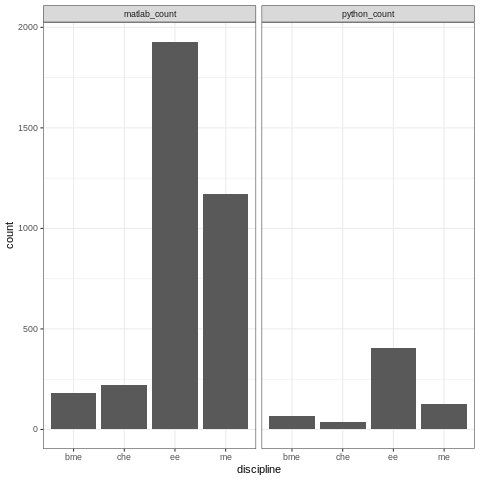

In [ ]:
%%R
summary_df %>%
pivot_longer(python_count:matlab_count, names_to = "language", values_to = "count") %>%
ggplot(aes(x = discipline, y = count)) +
geom_col() +
facet_grid(.~language) + 
theme_bw()